## Predicting Car Price
This project aims to practice the machine learning workflow to predict a car's market price using its attributes.
### Introduction to the data set
The dataset contains information about various cars. For each car, we have information about the technical aspects of the vehicle such as the motor's displacement, the weight, the miles per gallon, speed of acceleration, etc.  
[Data set information](https://archive.ics.uci.edu/ml/datasets/automobile).

In [1]:
# imports
import pandas as pd
# read data
cols = ['symboling', 'normalized_losses', 'make',
       'fuel_type', 'aspiration', 'num_doors',
       'body_style', 'drive_wheels', 'engine_location',
       'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'engine_type', 'num_cylinders',
        'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horespower', 'peak_rpm',
       'city_mpg', 'highway_mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

pd.options.display.max_columns = 99
cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horespower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


Because we want to predict cars price, the target column is `price`. 
Our machine learning model can't have missing values as features, therefore we need to do some data cleaning steps.
### Data Cleaning

In [2]:
import numpy

# replace ? with NaN
cars.replace('?', numpy.nan, inplace=True)

cars.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horespower,peak_rpm,city_mpg,highway_mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [3]:
# selecting continuous values only
numeric_cols = ['normalized_losses', 'wheel_base', 'length', 'width',
               'height', 'curb_weight', 'bore', 'stroke', 'compression_ratio',
               'horespower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']

cars_numeric = cars[numeric_cols]

cars_numeric.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horespower,peak_rpm,city_mpg,highway_mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [4]:
cars_numeric.dtypes

normalized_losses     object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
bore                  object
stroke                object
compression_ratio    float64
horespower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [5]:
# convert the columns into float data type
cars_numeric = cars_numeric.astype('float')

cars_numeric.isnull().sum()

normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horespower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

Let's remove the rows with missing values in the `price` column, because price is the value we want to predict.

In [6]:
cars_numeric.dropna(subset=['price'], inplace=True)

cars_numeric.isnull().sum()

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
bore                  4
stroke                4
compression_ratio     0
horespower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

Filling the missing values with column average is the next step to take.

In [7]:
cars_numeric = cars_numeric.fillna(cars_numeric.mean())

cars_numeric.isnull().sum()

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
bore                 0
stroke               0
compression_ratio    0
horespower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64

In [8]:
# normalizing the values
price_col = cars_numeric['price']

cars_normalized = (cars_numeric - cars_numeric.min()) / (cars_numeric.max()-cars_numeric.min())

cars_normalized['price'] = price_col
cars_normalized.head()

,normalized_losses,wheel_base,length,width,height,curb_weight,bore,stroke,compression_ratio,horespower,peak_rpm,city_mpg,highway_mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


### Univariate model

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle


def knn_train_test(train_col, target_col, df):
    '''
    train_col is a list of strings
    target_col is a string
    df is a dataframe
    ''' 
    
    knn = KNeighborsRegressor()
    numpy.random.seed(1)
    
    # randomly shuffle the rows in the data set
    df_shuffled = shuffle(df)
    
    # determine training set and test set
    half = int(len(df_shuffled) / 2)
    
    train = df_shuffled.iloc[:half]
    test = df_shuffled.iloc[half:]
    
    # fit the model
    knn.fit(train[train_col], train[target_col])
    
    # make predictions 
    prediction = knn.predict(test[train_col])
    
    # calculate the RMSE and return the value
    mse = mean_squared_error(test[target_col], prediction)
    rmse = numpy.sqrt(mse)
    return rmse   

Let's see which column gives the best result using the default `k` value. The default `k` value is `5`.

In [10]:
rmses = {}

cols_train = cars_normalized.columns.drop('price')

for col in cols_train:
    rmse = knn_train_test([col], 'price', cars_normalized)
    rmses[col] = rmse
    
rmses_sorted = pd.Series(rmses).sort_values()
rmses_sorted

horespower           4037.037713
curb_weight          4401.118255
highway_mpg          4630.026799
width                4704.482590
city_mpg             4766.422505
length               5427.200961
wheel_base           5461.553998
compression_ratio    6610.812153
bore                 6780.627785
normalized_losses    7330.197653
peak_rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

Modifying the function so it can accept a `k` value.

In [11]:
def knn_train_test(train_col, target_col, df, k):
    '''
    train_col is a list of strings
    target_col is a string
    df is a dataframe
    k is an integer
    ''' 
    
    knn = KNeighborsRegressor(n_neighbors=k)
    numpy.random.seed(1)
    
    # randomly shuffle the rows in the data set
    df_shuffled = shuffle(df)
    
    # determine training set and test set
    half = int(len(df_shuffled) / 2)
    
    train = df_shuffled.iloc[:half]
    test = df_shuffled.iloc[half:]
    
    # fit the model
    knn.fit(train[train_col], train[target_col])
    
    # make predictions 
    prediction = knn.predict(test[train_col])
    
    # calculate the RMSE and return the value
    mse = mean_squared_error(test[target_col], prediction)
    rmse = numpy.sqrt(mse)
    return rmse   

In [12]:
# create a dictionary with RMSE for different k values
rmses = {}
k_values = [1, 3, 5, 7, 9]

cols_train = cars_normalized.columns.drop('price')

for col in cols_train:
    rmses_k = {}
    for k in k_values:
        rmse = knn_train_test([col], 'price', cars_normalized, k=k)       
        rmses_k[k] = rmse
    rmses[col] = rmses_k
    
rmses

{'normalized_losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel_base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb_weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'stroke': {1: 9116.495955406906,
  3: 7338.68466990294,
  5: 8006

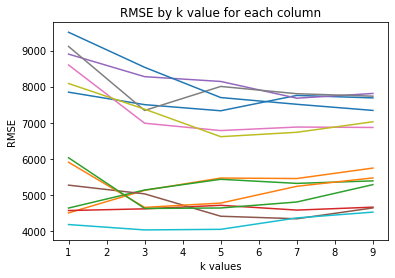

In [13]:
# visualize the results
import matplotlib.pyplot as plt
%matplotlib inline

for k, v in rmses.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x, y)
    plt.xlabel('k values')
    plt.ylabel('RMSE')
    plt.title('RMSE by k value for each column')

### Multivariate model
The function we wrote works for multiple columns from the dataset.
Let's use the best different number of features for the default `k` value of `5`.

In [14]:
features_5 = {}

def select_features():
    values = []
    for k, v in rmses.items():        
        for i, j in v.items():
            if i == 5:
                values.append([j,k])
    values.sort()
    for i in range(2, 6):
        items = []
        for item in values[:i]:
            items.append(item[1])
        features_5[i] = items
select_features()
features_5

{2: ['horespower', 'curb_weight'],
 3: ['horespower', 'curb_weight', 'highway_mpg'],
 4: ['horespower', 'curb_weight', 'highway_mpg', 'width'],
 5: ['horespower', 'curb_weight', 'highway_mpg', 'width', 'city_mpg']}

In [15]:
# a dictionary with RMSE for different number of features
rmse_5 = {}

for k, v in features_5.items():
    rmse = knn_train_test(v, 'price', cars_normalized, 5)
    rmse_5['{} best features'.format(k)] = rmse
    
rmse_5

{'2 best features': 3257.849049435976,
 '3 best features': 3365.9110004529675,
 '4 best features': 3358.6915801682458,
 '5 best features': 3341.6024539726504}

### Hyperparameter tuning
For the top 3 models from the last step, let's vary the hyperparameter value from 1 to 25.

In [16]:
features_5.pop(3, None)

rmse_1_25 = {}

for k, v in features_5.items():
    rmses = {}
    for i in range(1, 26):
        rmse = knn_train_test(v, 'price', cars_normalized, i)
        rmses[i] = rmse
    rmse_1_25[k] = rmses
    
rmse_1_25

{2: {1: 2790.1071433346656,
  2: 2700.7472352504356,
  3: 3003.7488055243016,
  4: 3106.605625597663,
  5: 3257.849049435976,
  6: 3660.48709284375,
  7: 3776.622550248818,
  8: 3990.519746861657,
  9: 4106.695501428088,
  10: 4292.927729786319,
  11: 4446.49068863902,
  12: 4474.5040774983045,
  13: 4535.433105685562,
  14: 4557.787134869417,
  15: 4626.44623473615,
  16: 4616.715111529423,
  17: 4627.590528180833,
  18: 4591.404760116439,
  19: 4602.10047883103,
  20: 4609.448817726754,
  21: 4643.491685319764,
  22: 4652.902519818285,
  23: 4697.632838416021,
  24: 4738.027378987156,
  25: 4760.49488106037},
 4: {1: 2600.746383728188,
  2: 2725.4325072335123,
  3: 3108.8580314362966,
  4: 3217.3135209486827,
  5: 3358.6915801682458,
  6: 3633.1687033129465,
  7: 3896.127441396644,
  8: 4002.8383900652543,
  9: 4055.5309369929582,
  10: 4128.67807741542,
  11: 4249.827289347268,
  12: 4344.035898237492,
  13: 4402.995293166156,
  14: 4424.314365328619,
  15: 4442.943179452285,
  16: 

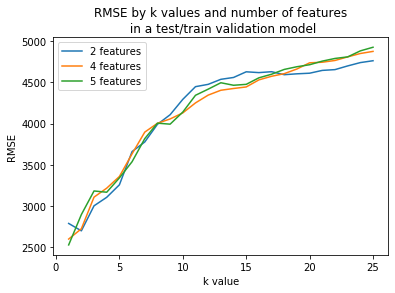

In [17]:
# visualize the results
labels = []
for k, v in rmse_1_25.items():
    x = list(v.keys())
    y = list(v.values())
    labels.append('{} features'.format(k))
    plt.plot(x, y)
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.title('RMSE by k values and number of features\n in a test/train validation model')
plt.legend(labels)

### K-Fold Cross Validation


In [18]:
from sklearn.model_selection import cross_val_score, KFold
cols = ['horespower', 'curb_weight', 'highway_mpg']

num_folds = [3, 5, 7, 9, 10, 11, 13, 15, 17, 19, 21, 23]
rse_folds = {}
for fold in num_folds:
    kf = KFold(fold, shuffle=True, random_state=1)
    model = KNeighborsRegressor()
    mses = cross_val_score(model, cars_normalized[cols], cars_normalized["price"], scoring="neg_mean_squared_error", cv=kf)
    rmses = numpy.sqrt(numpy.absolute(mses))
    avg_rmse = numpy.mean(rmses)
    std_rmse = numpy.std(rmses)
    rse_folds[fold] = avg_rmse
    
rse_folds

{3: 3184.7097337558043,
 5: 3070.9703850697315,
 7: 3122.1808499414155,
 9: 2973.091519895337,
 10: 2938.3705169184386,
 11: 2903.329601217355,
 13: 3011.3876774522223,
 15: 2885.1348324958176,
 17: 2825.226827084104,
 19: 2818.9507381922267,
 21: 2749.1107329136557,
 23: 2700.7235960570865}

Text(0.5, 1.0, 'Average RMSE by number of folds\n in a K-fold cross validation model')

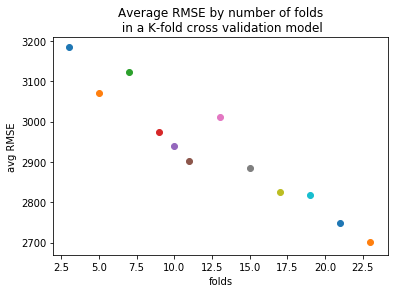

In [19]:
labels = []
for k, v in rse_folds.items():
    labels.append('{} features'.format(k))
    plt.scatter(k, v)
plt.xlabel('folds')
plt.ylabel('avg RMSE')
plt.title('Average RMSE by number of folds\n in a K-fold cross validation model')

### Conclusion
A quick K-fold cross validation on three columns demonstration showed better results for the RMSE. Further exploration with different parameters is needed. 